In [9]:
from pyseqrna import pyseqrna_utils as pu
from pyseqrna import quality_check as qc
from pyseqrna import quality_trimming as qt
from pyseqrna import  aligners as al
from pyseqrna import pyseqrna_stats as ps
from pyseqrna import quants
from pyseqrna import differential_expression as de
import pandas as pd

In [10]:
from pyseqrna.pyseqrna_utils import PyseqrnaLogger

log = PyseqrnaLogger(mode='w', log='pp')

log.info("Analysis started")

[11:11:40]  3148109007 :: INFO : Analysis started


In [11]:
data = pu.read_input_file("pyseqrna/example/input_Sample_PE.txt", "pyseqrna/example/data/" , paired=True)
samples= data['samples']

[11:11:40]  pyseqrna_utils :: INFO : Reading input samples File 
[11:11:40]  pyseqrna_utils :: INFO : Input file pyseqrna/example/input_Sample_PE.txt read succesfully
[11:11:40]  pyseqrna_utils :: INFO : Combination created succesfully from pyseqrna/example/input_Sample_PE.txt
[11:11:40]  pyseqrna_utils :: INFO : targets dataframe fro differenatial created succesfully from pyseqrna/example/input_Sample_PE.txt


In [12]:
pu.make_directory("pySeqRNA_results")

[11:11:40]  pyseqrna_utils :: INFO : Succesfully created directory /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results.1


'/home/nav/Documents/Projects/pyseqrna/pySeqRNA_results.1'

In [13]:

a = qt.flexbarRun(sampleDict=samples, paired=True)

[11:11:40]  quality_trimming :: INFO : Using default config file flexbar.ini
[11:11:40]  pyseqrna_utils :: INFO : Config generated succesfully from /home/nav/Documents/Projects/pyseqrna/pyseqrna/param/flexbar.ini
[11:11:40]  pyseqrna_utils :: INFO : Succesfully created directory /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/flexbar_results.2
[11:11:40]  pyseqrna_utils :: WARNING : number of threads changed to available 3
[11:11:45]  quality_trimming :: INFO : Job successfully completed for SRR446027_1.fastq.gz and SRR446027_2.fastq.gz with status 0
[11:11:52]  quality_trimming :: INFO : Job successfully completed for SRR446028_1.fastq.gz and SRR446028_2.fastq.gz with status 0
[11:11:57]  quality_trimming :: INFO : Job successfully completed for SRR446029_1.fastq.gz and SRR446029_2.fastq.gz with status 0
[11:12:04]  quality_trimming :: INFO : Job successfully completed for SRR446030_1.fastq.gz and SRR446030_2.fastq.gz with status 0
[11:12:10]  quality_trimming :: INFO : Job suc

In [14]:
aligner = al.STAR_Aligner(genome="pyseqrna/example/data/tair10.fasta")

[11:13:46]  pyseqrna_utils :: INFO : Config generated succesfully from /home/nav/Documents/Projects/pyseqrna/pyseqrna/param/STAR.ini
[11:13:46]  aligners :: INFO : Using default config file STAR.ini


In [15]:
j = aligner.build_index()

[11:13:46]  pyseqrna_utils :: WARNING : number of threads changed to available 3
[11:13:46]  pyseqrna_utils :: INFO : Succesfully created directory /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_index.2
[11:13:46]  aligners :: INFO : tair10.fasta copied successfully in star_index
[11:14:09]  aligners :: INFO : Job successfully completed for /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_index.2/tair10.fasta for indexing


In [16]:
aligner.check_index()

True

In [17]:
outalign, job = aligner.run_Alignment(target=a[0], pairedEND=True)

[11:14:11]  pyseqrna_utils :: WARNING : number of threads changed to available 3
[11:14:11]  pyseqrna_utils :: INFO : Succesfully created directory /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2
[11:14:48]  aligners :: INFO : Job successfully completed for M1A_1.fastq.gz and M1A_2.fastq.gz for alignment
[11:15:16]  aligners :: INFO : Job successfully completed for M1B_1.fastq.gz and M1B_2.fastq.gz for alignment
[11:15:26]  aligners :: INFO : Job successfully completed for A1A_1.fastq.gz and A1A_2.fastq.gz for alignment
[11:15:53]  aligners :: INFO : Job successfully completed for A1B_1.fastq.gz and A1B_2.fastq.gz for alignment
[11:16:14]  aligners :: INFO : Job successfully completed for V1A_1.fastq.gz and V1A_2.fastq.gz for alignment
[11:16:26]  aligners :: INFO : Job successfully completed for V1B_1.fastq.gz and V1B_2.fastq.gz for alignment
[11:16:35]  aligners :: INFO : Job successfully completed for M6A_1.fastq.gz and M6A_2.fastq.gz for alignment
[11:16:49]  

In [18]:
df= ps.align_stats(sampleDict=samples,trimDict=a[0],bamDict=outalign, pairedEND=True)

In [61]:
df.to_excel("pySeqRNA_results.1/alignment_stats.xlsx", index=False)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

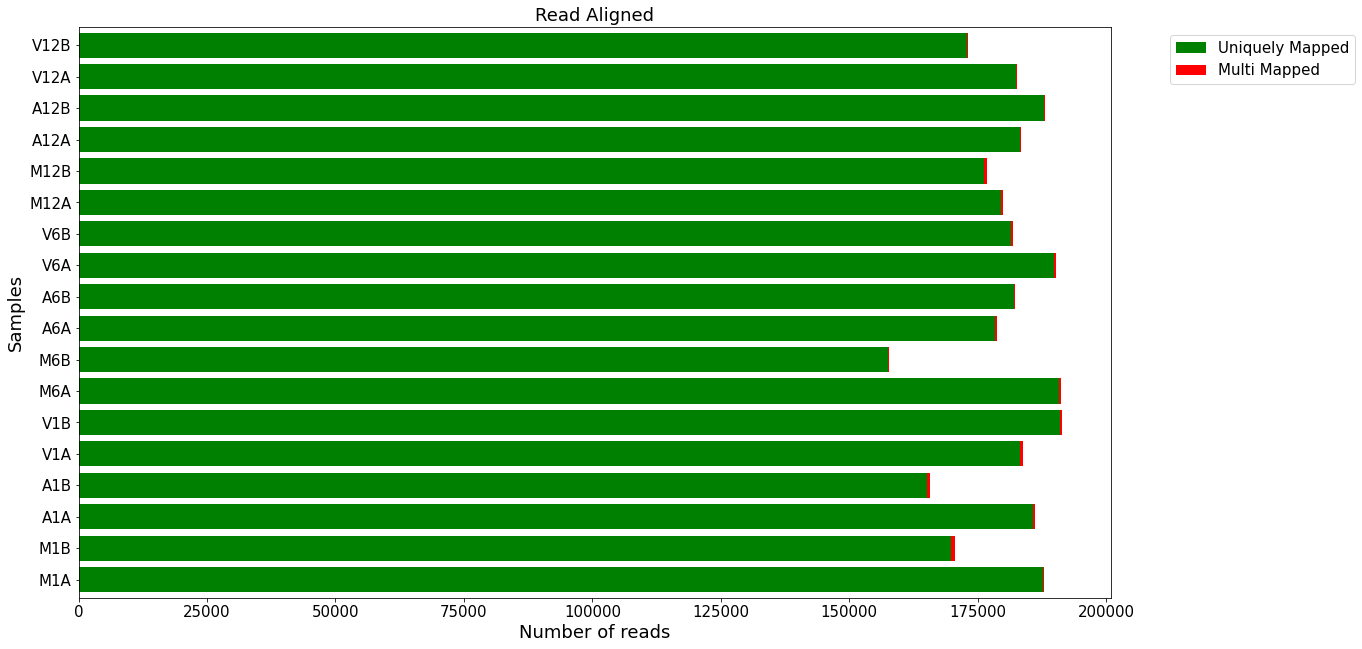

In [21]:
sample = list(df['Sample'])
creads = list(df['Uniquely_mapped'])
iread = list(df['Multi_mapped'])
# tc= list(df['Input_reads2x']-df['Aligned'])

plt.barh(sample,creads,0.8,label="cleaned Reads", color='Green')
plt.barh(sample, iread, 0.8,left=creads, label="discarded", color='Red')
plt.title("Read Aligned", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of reads", fontsize=18)
plt.ylabel("Samples", fontsize=18)
plt.legend(['Uniquely Mapped', 'Multi Mapped'], bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=15)
plt.margins(y=0.01)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [22]:
a= quants.featureCount(bamDict=outalign, gff="pyseqrna/example/data/tair10.gff", outDir="pySeqRNA_results.1")

[11:20:10]  pyseqrna_utils :: INFO : Config generated succesfully from /home/nav/Documents/Projects/pyseqrna/pyseqrna/param/featureCount.ini
[11:20:10]  quants :: INFO : Using default config file featureCount.ini


/home/nav/miniconda3/envs/pyseqrna/bin/featureCounts  -a pyseqrna/example/data/tair10.gff -o pySeqRNA_results.1/Counts.txt -T 5 -g ID -t gene /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/M1AAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/M1BAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/A1AAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/A1BAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/V1AAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/V1BAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/M6AAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/M6BAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/star_results.2/A6AAligned.out.bam /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/st

[11:20:15]  quants :: INFO : Job successfully completed for feature count


In [26]:
counts= pd.read_csv("pySeqRNA_results.1/Counts_final.txt", sep="\t")

In [27]:
counts

,Gene,M1A,M1B,A1A,A1B,V1A,V1B,M6A,M6B,A6A,A6B,V6A,V6B,M12A,M12B,A12A,A12B,V12A,V12B
0,AT1G01010,56,230,202,186,360,236,46,38,154,46,300,394,116,140,130,62,232,120
1,AT1G01020,30,99,78,126,116,90,24,28,26,6,98,164,47,86,38,24,44,38
2,AT1G01030,42,103,80,64,102,162,10,14,8,8,36,154,31,36,14,10,74,98
3,AT1G01040,198,693,517,682,607,667,164,162,256,78,702,1047,337,628,377,81,204,172
4,AT1G01046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,ATMG00160,20,83,93,130,70,96,45,48,79,11,140,192,128,237,123,14,77,55
140,ATMG00170,4,16,6,22,15,13,7,7,8,0,9,20,7,10,6,0,0,1
141,ATMG00180,31,87,61,89,50,92,54,60,62,10,86,115,58,75,51,11,60,20
142,ATMG00190,3,0,3,5,1,1,0,3,0,0,4,3,0,2,1,1,2,0


In [28]:
targets= data['targets']
comb= data['combinations']

In [29]:
dd= de.runDESeq2(countDF=counts,targetFile=targets,design='sample', combination=comb)

In [31]:
dd.to_excel(os.path.join("pySeqRNA_results.1","Raw_DEGs_all.xlsx"), index=False)

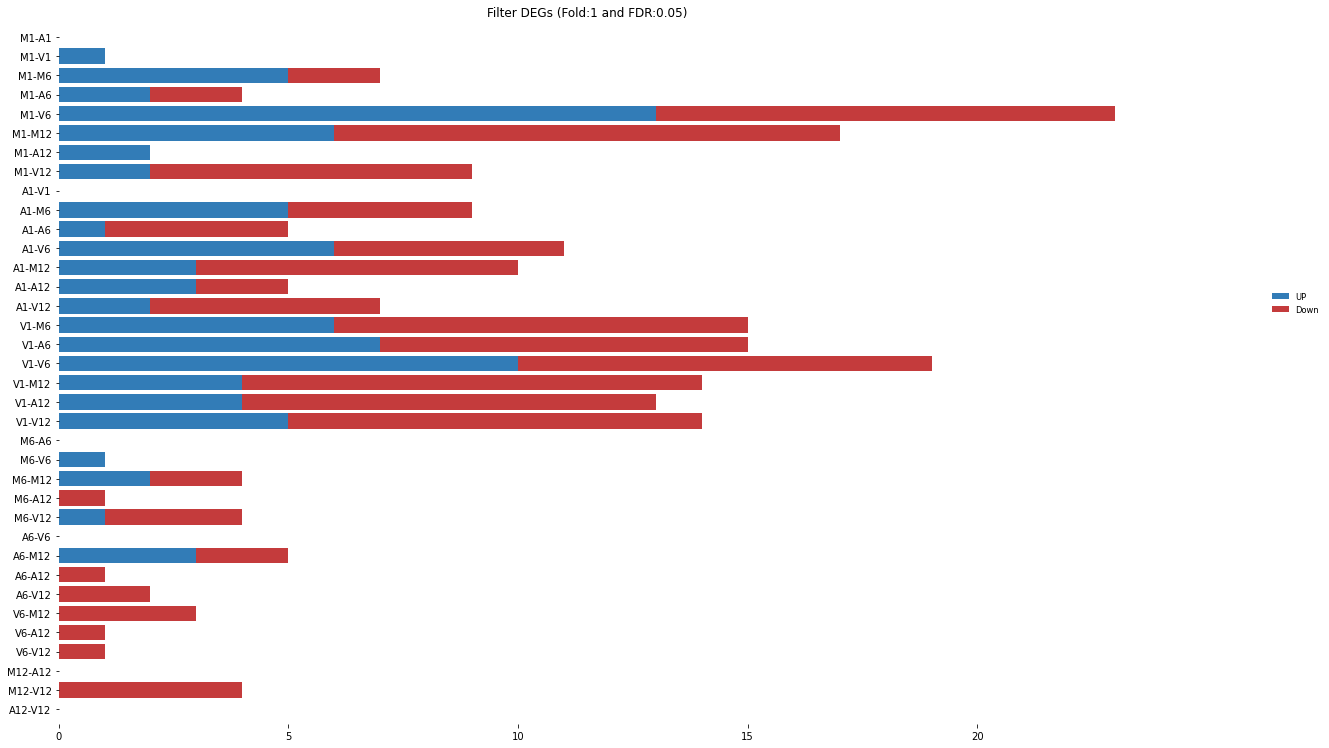

In [32]:
filtered_DEG = de.degFilter(degDF=dd, CompareList=comb, FDR=0.05, FOLD=1)

In [34]:
wd= pd.ExcelWriter(os.path.join("pySeqRNA_results.1","filtered_DEGs.xlsx"))
for key, value in filtered_DEG['filtered'].items():
    value.to_excel(wd,sheet_name=key)
    wd.save()
wd.close()

In [35]:
pu.getGenes(os.path.join("pySeqRNA_results.1","filtered_DEGs.xlsx"), combinations=comb)

[11:31:35]  pyseqrna_utils :: INFO : Succesfully created directory /home/nav/Documents/Projects/pyseqrna/pySeqRNA_results/diff_genes


In [38]:
from pyseqrna import normalize_counts as nc

In [39]:
rpkm = nc.Normalization(countFile="pySeqRNA_results.1/Counts_final.txt", featureFile="pyseqrna/example/data/tair10.gff")

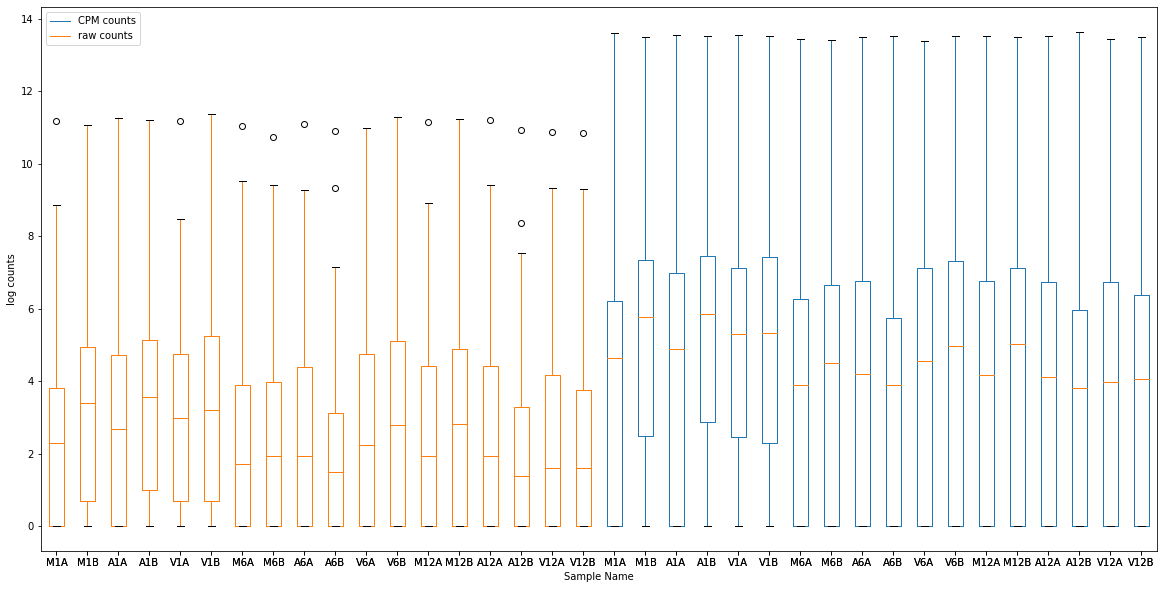

In [48]:
rpk = rpkm.CPM()

In [44]:
rpk[0].to_excel("pySeqRNA_results.1/rpkm.xlsx")

In [45]:
rcount= pd.read_excel("pySeqRNA_results.1/rpkm.xlsx")

In [36]:
from pyseqrna import pyseqrna_plots as pp

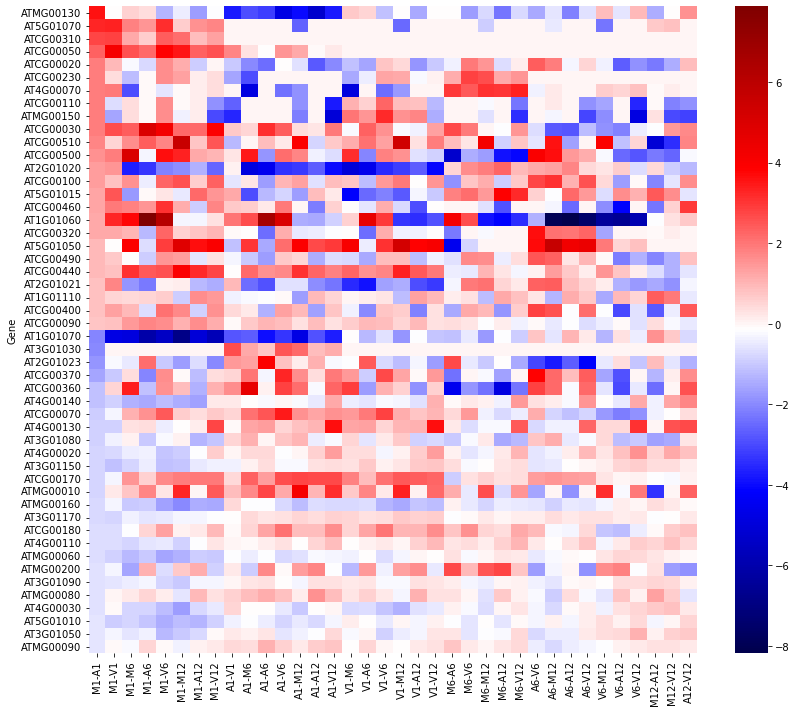

In [47]:
heatmap, ax = pp.plotHeatmap(dd,combinations=comb,num=50, type='deg')

In [50]:
from pyseqrna import gene_ontology as go

In [51]:
bdata= go.query('athaliana')

In [52]:
gdata = go.preprocessBioMart(bdata)

In [53]:
results = go.enrichGO(gdata,"pySeqRNA_results.1/diff_genes/M1-V6.txt")

In [55]:
results.to_excel("pySeqRNA_results.1/M1-V6_go.xlsx", index=False)

In [58]:
cd= pd.read_excel("pySeqRNA_results.1/M1-V6_deg.xlsx")

In [60]:
x,y = pp.plotVolcano(cd,'M1-V6',1)

UnboundLocalError: local variable 'fig' referenced before assignment